In [1]:
import numpy as N
import numpy.random as NR
import pandas
import tqdm
import matplotlib.pyplot as pyplot
import seaborn

seaborn.set_style('whitegrid')

import tqdm
import torch as T
import torch.distributions as TD
import torch.distributions.constraints as TDC
import torch.nn as TN
import torch.nn.functional as TNF
import pyro as P
import pyro.infer as PI
import pyro.optim as PO
import pyro.distributions as PD
import pyro.nn as PN

P.set_rng_seed(0)

In [2]:
import sys
sys.path.append('..')
sys.path.append('../..')
import igg
import model
import guide_gmade as guide

all_dependencies yn ['_hidden']
all_dependencies wn ['yn']
all_dependencies wn ['yn']
all_sets [(0,)]
input_ordering [0]
out_sets [(0,)]
out_orderings [0]
hid_orderings size 64
num hid layers: 1
expanded_input_ordering size 16
expanded_output_ordering size 2
all_sets [(0,)]
input_ordering [0]
out_sets [(0,)]
out_orderings [0]
hid_orderings size 8
num hid layers: 1
expanded_input_ordering size 1
expanded_output_ordering size 2
number of levels: 2
input_levels [['_hidden'], ['yn']]
out_levels [['yn'], ['wn']]
all_dependencies n ['obs']
all_sets [(0,)]
input_ordering [0]
out_sets [(0,)]
out_orderings [0]
hid_orderings size 8
num hid layers: 1
expanded_input_ordering size 1
expanded_output_ordering size 5
number of levels: 1
input_levels [['obs']]
out_levels [['n']]


In [3]:
def draw():
    mu = NR.uniform(0, 5)
    obs = NR.normal(mu, 1.0, (1,))
    return float(obs.astype('float32'))

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:33<00:00, 93.48it/s]


<AxesSubplot:xlabel='step', ylabel='loss'>

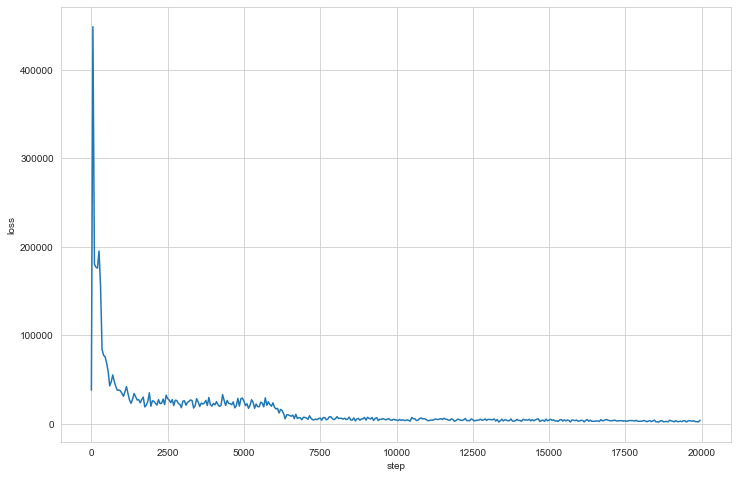

In [4]:
P.clear_param_store()
svi = PI.SVI(model=model.model,
            guide=guide.model,
            optim=PO.Adam({'lr': 1e-3}),
             loss=PI.Trace_ELBO()
            )
hist = pandas.DataFrame(columns=["step", "loss"])
l = 0
for step in tqdm.trange(20000):
    obs = draw()
    loss = svi.step(obs)
    l += loss
    if step % 50 == 0:
        
        hist = hist.append({
            "step": step,
            "loss": l
        }, ignore_index=True)
        l = 0

fig, ax = pyplot.subplots(figsize=(12,8))
seaborn.lineplot(x="step", y="loss", data=hist, ax=ax)